# Predictive Model for Customer Booking Completion 

In this analysis, I created a Random classifier Model to help British Airways Company to predict customers who completed Bookings with them.

In [41]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)

    return df

In [3]:
df = wrangle(r"C:\Users\User\Desktop\OnGOD\customer-bookings.csv")
#df = wrangle(r"C:\Users\User\Desktop\100DayOfCode\Titanic_clean.csv")

In [4]:
df["flight_day"].nunique()

7

In [5]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


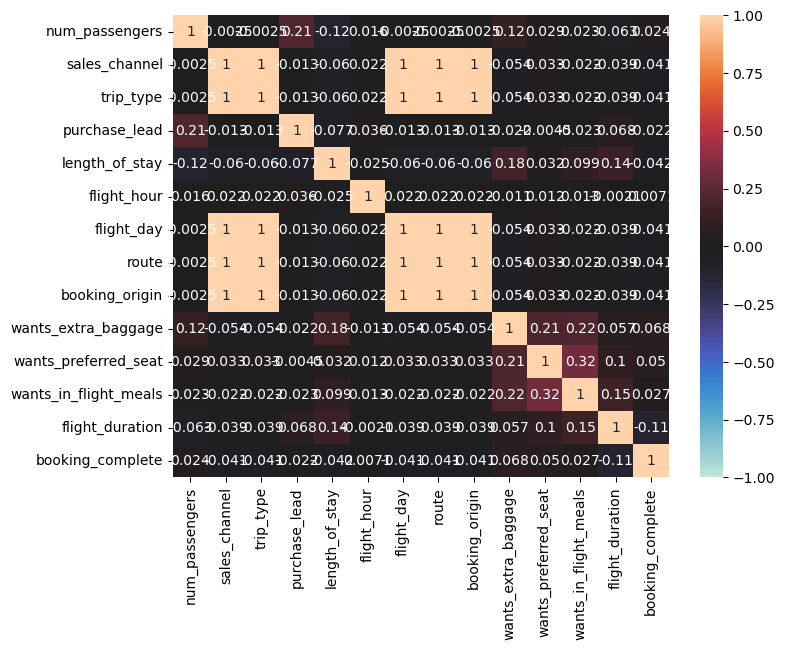

In [8]:
# To plot a heatmap
features = (col for col in df.columns)
corr_cols = df[features].copy()
# To Encode categorical features
label_sales = LabelEncoder()
label_trip = LabelEncoder()
label_flight = LabelEncoder()
label_route	= LabelEncoder()
label_booking = LabelEncoder()

corr_cols["sales_channel"] = label_sales.fit_transform(corr_cols["sales_channel"])
corr_cols["trip_type"] = label_trip.fit_transform(corr_cols["sales_channel"])
corr_cols["flight_day"] = label_flight.fit_transform(corr_cols["sales_channel"])
corr_cols["route"] = label_route.fit_transform(corr_cols["sales_channel"])
corr_cols["booking_origin"] = label_booking.fit_transform(corr_cols["sales_channel"])

# Heatmap
corr = corr_cols.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot=True, vmin =-1, vmax = 1, center = 0);


In [9]:
df["booking_complete"].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

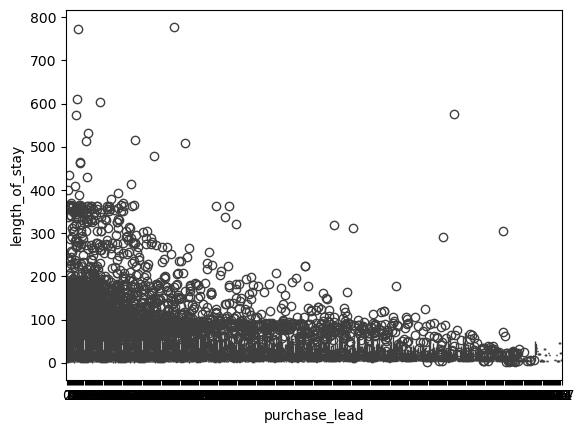

In [10]:
# visual exploration
# Boxplot plot
sns.boxplot(x="purchase_lead", y = "length_of_stay", data = df)
plt.show();

In [11]:
df.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0


In [12]:
df["flight_day"].nunique()

7

In [13]:
# Encode categorical columns
# Low cardinlity comlumns 
cat_cols = ["sales_channel", "trip_type", "flight_day"]
df = pd.get_dummies(df, columns = cat_cols, drop_first = 1)
    

In [14]:
# To convert bool to int o the new dataset
for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int) 

In [15]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,262,19,7,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1,0,1,0,0,0,0
1,1,112,20,3,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1,0,1,0,0,0,0
2,2,243,22,17,AKLDEL,India,1,1,0,5.52,0,0,0,1,0,0,0,0,0,1
3,1,96,31,4,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1,0,1,0,0,0,0
4,2,68,22,15,AKLDEL,India,1,0,1,5.52,0,0,0,1,0,0,0,0,0,1


In [16]:
# Encode multicollinearlity(route) columns using the target
route_encoding = df.groupby('route')['booking_complete'].mean()
df['route_encoded'] = df['route'].map(route_encoding)

# Encode multicollinearlity(route) columns using the target
origin_encoding = df.groupby("booking_origin")["booking_complete"].mean()
df["origin_encoded"] = df["booking_origin"].map(origin_encoding)

In [17]:
# Drop column high cordinality
df.drop(columns = ["route", "booking_origin"], inplace = True)

In [18]:
# Standardize the numerical cols
scaler = StandardScaler()
num_cols = ["num_passengers","purchase_lead","length_of_stay",	"flight_hour","flight_duration"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [19]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_encoded,origin_encoded
0,0.400684,1.957530,-0.119353,-0.381764,1,0,0,-1.174175,0,0,0,1,0,1,0,0,0,0,0.0,0.050279
1,-0.579559,0.299164,-0.089844,-1.120780,0,0,0,-1.174175,0,0,0,1,0,1,0,0,0,0,0.0,0.050279
2,0.400684,1.747470,-0.030824,1.465775,1,1,0,-1.174175,0,0,0,1,0,0,0,0,0,1,0.0,0.103150
3,-0.579559,0.122272,0.234761,-0.936026,0,0,1,-1.174175,0,0,0,1,0,1,0,0,0,0,0.0,0.050279
4,0.400684,-0.187290,-0.030824,1.096267,1,0,1,-1.174175,0,0,0,1,0,0,0,0,0,1,0.0,0.103150


In [20]:
# To sepparate fatures and Target
feature = (col for col in df.columns if col not in ("booking_complete"))
X = df[feature]
y = df["booking_complete"]

In [21]:
X.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_encoded,origin_encoded
0,0.400684,1.957530,-0.119353,-0.381764,1,0,0,-1.174175,0,0,1,0,1,0,0,0,0,0.0,0.050279
1,-0.579559,0.299164,-0.089844,-1.120780,0,0,0,-1.174175,0,0,1,0,1,0,0,0,0,0.0,0.050279
2,0.400684,1.747470,-0.030824,1.465775,1,1,0,-1.174175,0,0,1,0,0,0,0,0,1,0.0,0.103150
3,-0.579559,0.122272,0.234761,-0.936026,0,0,1,-1.174175,0,0,1,0,1,0,0,0,0,0.0,0.050279
4,0.400684,-0.187290,-0.030824,1.096267,1,0,1,-1.174175,0,0,1,0,0,0,0,0,1,0.0,0.103150


In [43]:
# Reduce imbalace with smpote
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [44]:
y_train.value_counts()

booking_complete
0    34002
1     5998
Name: count, dtype: int64

In [45]:
y_train_smote.value_counts()

booking_complete
0    34002
1    34002
Name: count, dtype: int64

In [57]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Tune model with GridSearch
rf_model = RandomForestClassifier(random_state = 42)
params = {
    "n_estimators": [50,100, 200],
    "max_depth":[None, 10, 100]
}
grid_search = GridSearchCV(rf_model, params, cv = 5, scoring = "f1")
grid_search.fit(X_train_smote, y_train_smote)
#grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 100],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [58]:
# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print(f"Model accuracy score: {accuracy: .2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model accuracy score:  0.84
ROC-AUC Score: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      8520
           1       0.44      0.36      0.40      1480

    accuracy                           0.84     10000
   macro avg       0.66      0.64      0.65     10000
weighted avg       0.82      0.84      0.83     10000



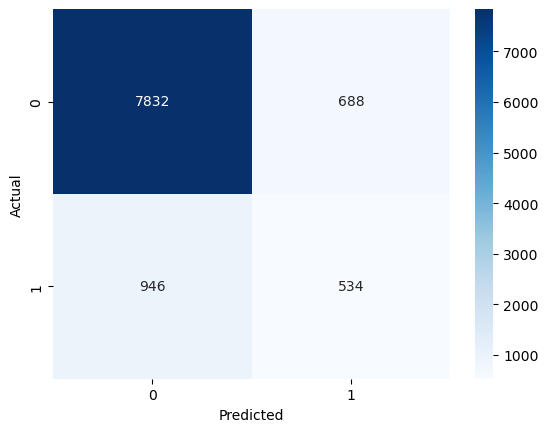

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

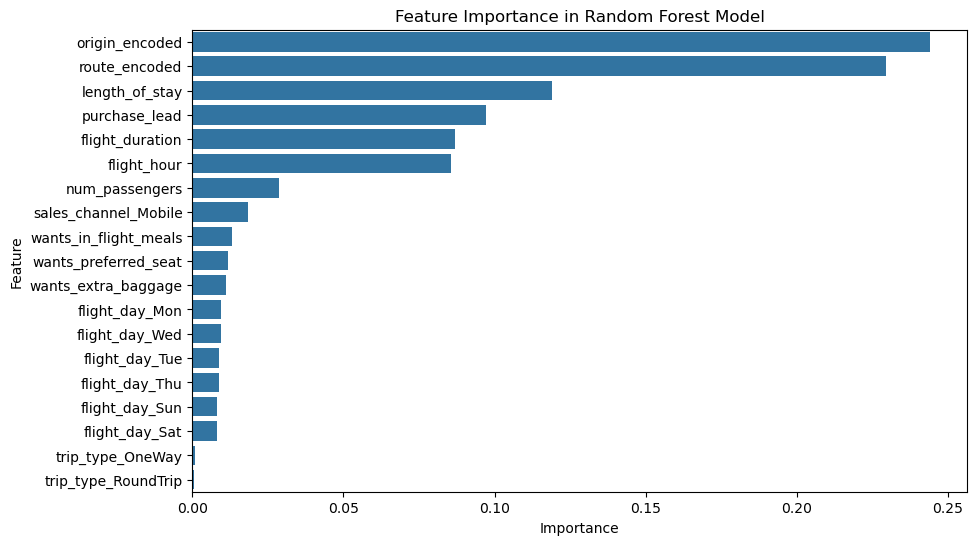

In [60]:
# Visualiz features by importance
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': importances
}
)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()